# Diabetes

Импортируем необходимые для работы библиотеки

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
RAND = 12345
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Откроем датасет и посмотрим на его первые 5 строк

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/diabetes/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Проверим на наличие пропусков и формат столбцлв

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

В данных пропусков нет, все данные в формате float. Переведем данные в целочисленный формат. Так как это медицинские данные и они обезличены, дубликаты в таких данных допустимы

In [4]:
df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']] = df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

Посмотрим диагноз пациентов в процентном соотношении 

(-1.25, 1.25, -1.25, 1.25)

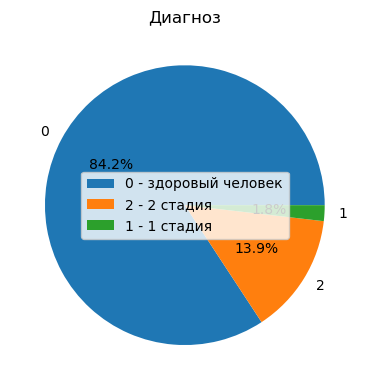

In [5]:
df.Diabetes_012.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.legend(['0 - здоровый человек', '2 - 2 стадия', '1 - 1 стадия'])
plt.title('Диагноз')
plt.tight_layout()
plt.axis('off')

Для проверки зависимости показателей визуализируем показатели

<Axes: >

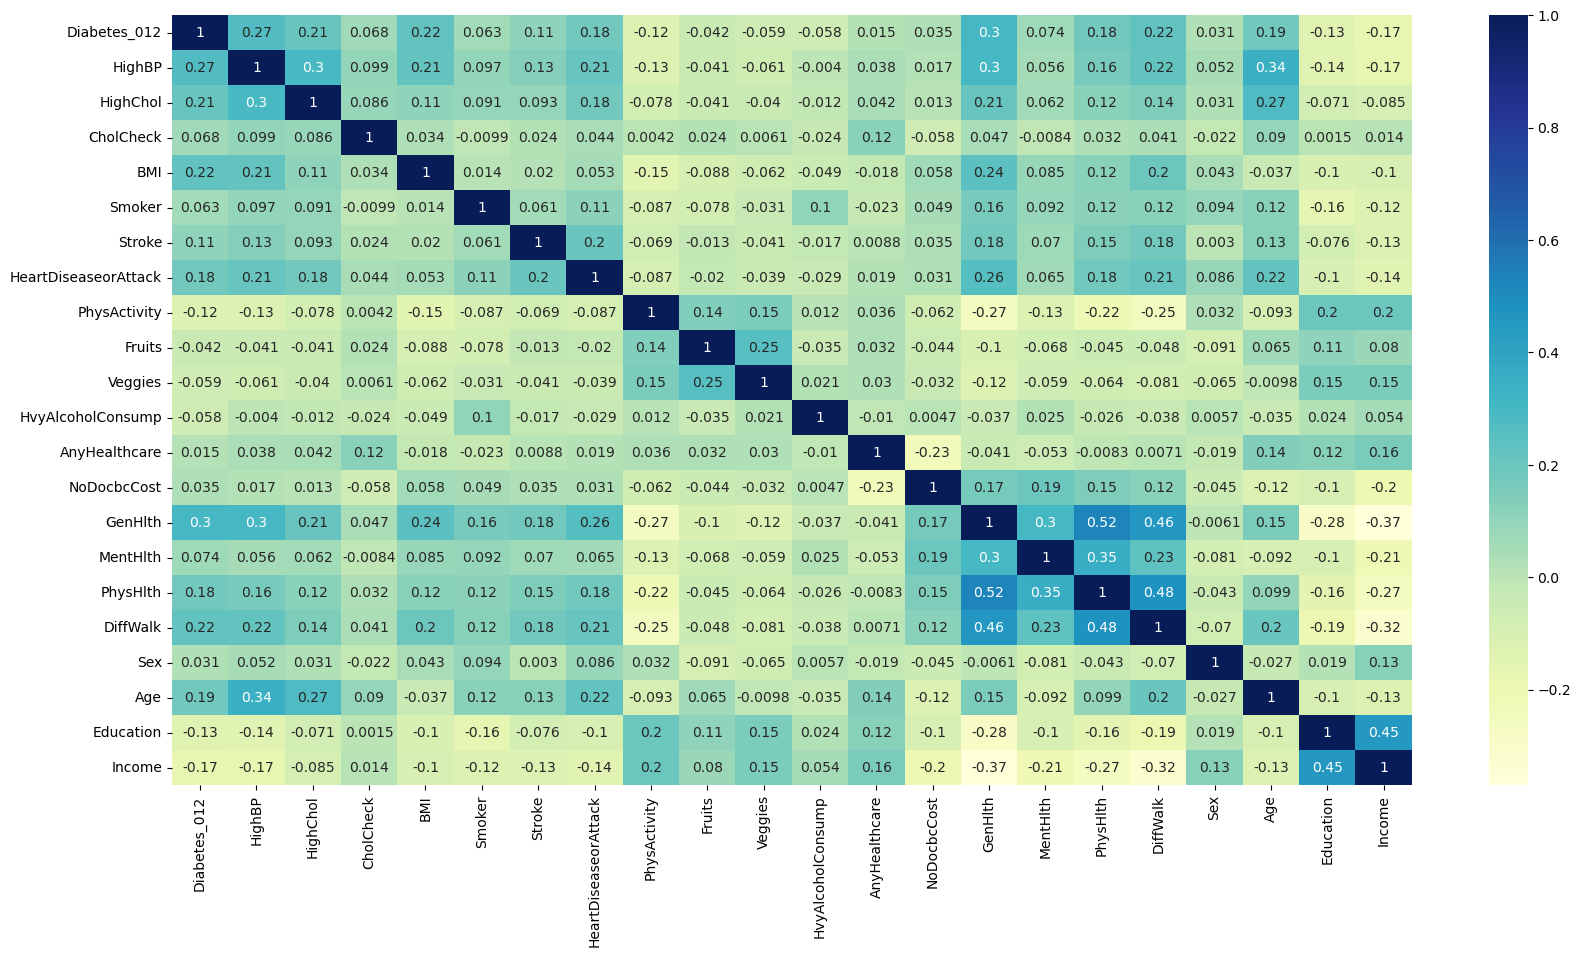

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

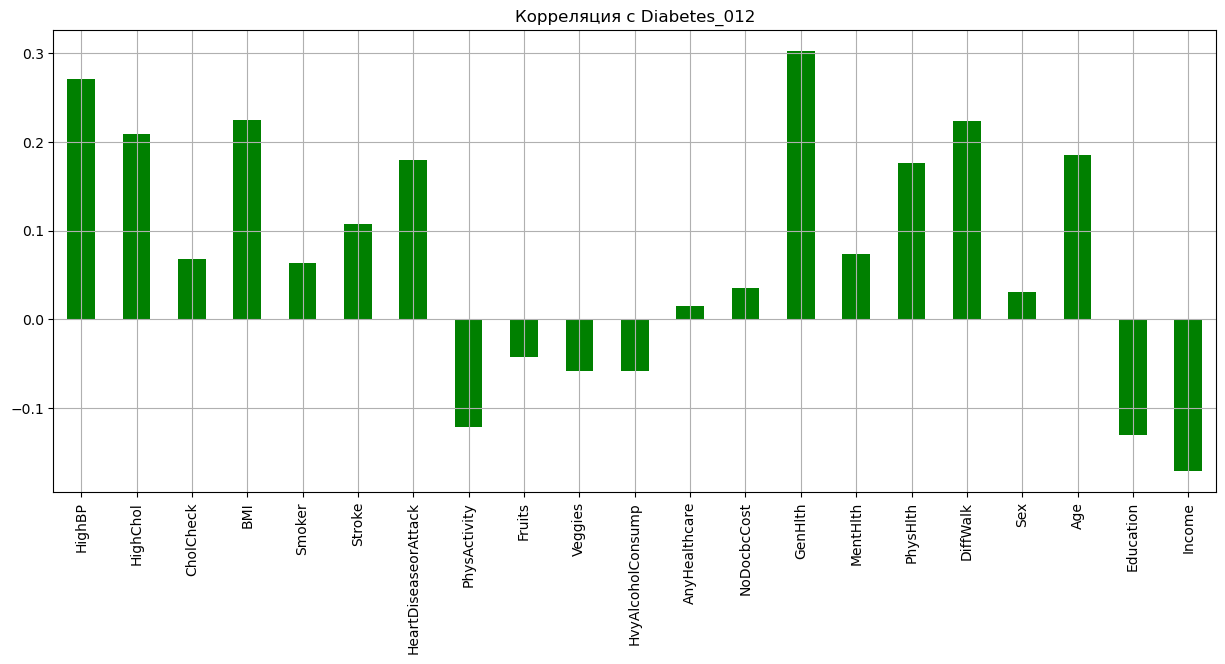

In [7]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Корреляция с Diabetes_012",color="green");

## Обучение моделей

Разделим наши данные на признаки  целевой признак

In [8]:
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

Разделим данные на обучающую и тестовую выборки в соотношении 70/30

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RAND)

In [42]:
y_train.shape

(177576,)

In [41]:
y_test.shape

(76104,)

## 1. RandomForestClassifier

Обучим модель без подбора гиперпараметров

In [10]:
model_rf = RandomForestClassifier(random_state=RAND)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print('Result RF:', accuracy_rf)

Result RF: 0.8403237674760854


In [11]:
without_hyperparameters = []
without_hyperparameters.append({'RandomForestClassifier':accuracy_rf})

С помощью цикла подберем лучший результат в промежутке заданных параметров

In [12]:
%time
result_rf =[]
for depth in range(1, 10):
    for est in range(10, 101, 10):
        model = RandomForestClassifier(random_state=RAND, n_estimators=est, max_depth=depth)
        model.fit(X_train, y_train)
        predictions_test_rf = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, predictions_test_rf)
        result_rf.append({'Model name': 'RandomForestClassifier',
                         'Hyperparameters': {'random_state':123,
                                            'n_estimators': est,
                                            'max_depth': depth},
                         'Accuracy score': accuracy_test})

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
diagnos_rf = pd.DataFrame.from_dict(result_rf)
diagnos_rf[diagnos_rf['Accuracy score'] == diagnos_rf['Accuracy score'].max()]

,Model name,Hyperparameters,Accuracy score
88,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 90, 'max...",0.846986


In [14]:
best_results =[]
best_results.append(diagnos_rf.loc[88])

In [15]:
print(classification_report(y_test, predictions_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     64008
           1       0.00      0.00      0.00      1392
           2       0.61      0.10      0.17     10704

    accuracy                           0.85     76104
   macro avg       0.49      0.36      0.36     76104
weighted avg       0.80      0.85      0.79     76104



In [37]:
confusion_matrix(y_test, predictions_test_rf)

array([[63377,     0,   631],
       [ 1333,     0,    59],
       [ 9625,     0,  1079]], dtype=int64)

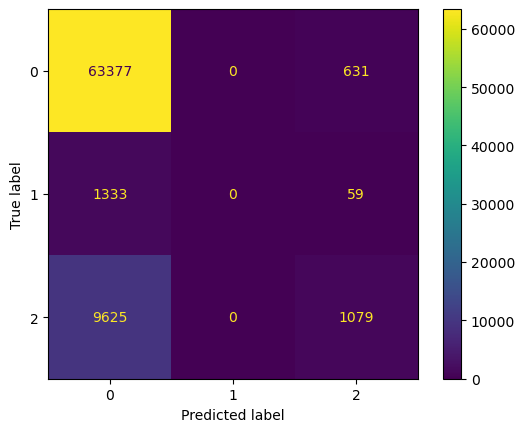

In [16]:
cm = confusion_matrix(y_test, predictions_test_rf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

## 2. DecisionTreeClassifier

Со параметрами по умолчанию

In [17]:
model_dt = DecisionTreeClassifier(random_state=123)
model_dt.fit(X_train, y_train)
predictions_test = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_test)
print('Result DT:', accuracy_dt)

Result DT: 0.7660701145800484


In [18]:
without_hyperparameters.append({'DecisionTreeClassifier':accuracy_dt})

Подбор параметра depth

In [19]:
result_dt = []
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=RAND, max_depth=depth)
    model.fit(X_train, y_train)
    predictions_test_dt = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test_dt)
    result_dt.append({'Model name': 'DecisionTreeClassifier',
                     'Hyperparameters': {'random_state': 123, 'max_depth':depth},
                                        'Accuracy score': accuracy_test})

In [20]:
diagnos_dt = pd.DataFrame.from_dict(result_dt)
diagnos_dt[diagnos_dt['Accuracy score'] == diagnos_dt['Accuracy score'].max()]

,Model name,Hyperparameters,Accuracy score
4,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 5}",0.845921


In [21]:
best_results.append(diagnos_dt.loc[4])

In [22]:
print(classification_report(y_test, predictions_test_dt))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     64008
           1       0.17      0.00      0.00      1392
           2       0.54      0.15      0.23     10704

    accuracy                           0.85     76104
   macro avg       0.52      0.38      0.38     76104
weighted avg       0.80      0.85      0.80     76104



In [35]:
confusion_matrix(y_test, predictions_test_dt)

array([[62787,     5,  1216],
       [ 1279,     1,   112],
       [ 9126,     0,  1578]], dtype=int64)

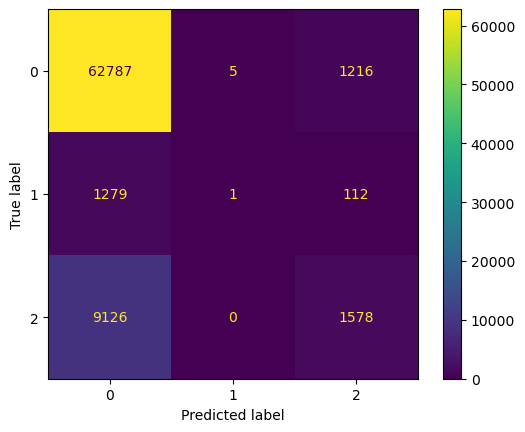

In [23]:
cm = confusion_matrix(y_test, predictions_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()


## 3. LogisticRegression

Также обучим без подбора параметров

In [24]:
model_lr_without_hyperparameters = LogisticRegression()
model_lr_without_hyperparameters.fit(X_train, y_train)
predictions_lr = model_lr_without_hyperparameters.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
accuracy_lr

0.8425312729948492

In [25]:
without_hyperparameters.append({'LogisticRegression':accuracy_lr})

Применим гиперпараметры

In [26]:
results_lr = []
model_lr = LogisticRegression(random_state=123, solver='lbfgs', penalty='l2')
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
results_lr.append({'Model name': 'LogisticRegression',
                 'Hyperparameters': {'random_state': 123, 'solver':'lbfgs', 'penalty': 'l2'},
                 'Accuracy score': accuracy_lr})
accuracy_lr

0.8425312729948492

Попробуем применить другие гиперпараметры(solver='liblinear', penalty='l1')

In [27]:
model_lr = LogisticRegression(random_state=123, solver='liblinear', penalty='l1', C=0.001)
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
results_lr.append({'Model name': 'LogisticRegression',
                 'Hyperparameters': {'random_state': 123, 'solver':'liblinear', 'penalty': 'l1'},
                 'Accuracy score': accuracy_lr})
accuracy_lr

0.8423735940292232

Разницы практически нет

In [28]:
diagnos_lr = pd.DataFrame.from_dict(results_lr)
diagnos_lr[diagnos_lr['Accuracy score'] == diagnos_lr['Accuracy score'].max()]

,Model name,Hyperparameters,Accuracy score
0,LogisticRegression,"{'random_state': 123, 'solver': 'lbfgs', 'pena...",0.842531


In [29]:
users_behavior_lr = pd.DataFrame.from_dict(results_lr)
best_results.append(users_behavior_lr.loc[0])

In [30]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     64008
           1       0.00      0.00      0.00      1392
           2       0.51      0.09      0.16     10704

    accuracy                           0.84     76104
   macro avg       0.45      0.36      0.36     76104
weighted avg       0.79      0.84      0.79     76104



In [36]:
confusion_matrix(y_test, predictions_lr)

array([[63127,     0,   881],
       [ 1321,     0,    71],
       [ 9723,     0,   981]], dtype=int64)

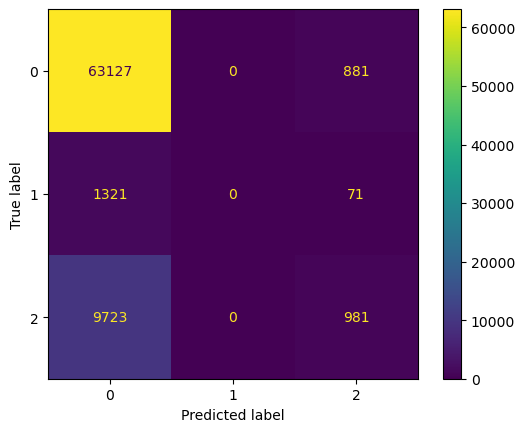

In [31]:
cm = confusion_matrix(y_test, predictions_lr, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

## Сравнение Моделей

Для начала сравним модели без подбора гиперпараметров

In [32]:
pd.DataFrame(without_hyperparameters)

,RandomForestClassifier,DecisionTreeClassifier,LogisticRegression
0,0.840324,NaN,NaN
1,NaN,0.76607,NaN
2,NaN,NaN,0.842531


По результатам из таблицы видим, что LogisticRegression немногим лучше справилась с задачей, чем RandomForestClassifier. DecisionTreeClassifier показал результат хуже 

Теперь результат работы моделей с перебором параметров

In [33]:
pd.DataFrame(best_results)

,Model name,Hyperparameters,Accuracy score
88,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 90, 'max...",0.846986
4,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 5}",0.845921
0,LogisticRegression,"{'random_state': 123, 'solver': 'lbfgs', 'pena...",0.842531


Все 3 модели показали примерно одинаковый результат при подборе параметров